In [27]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# EUC-KR 인코딩으로 파일 읽기
df = pd.read_csv("./서울시  대기오염도 정보.csv", encoding='euc-kr')

df.head()


,측정년도,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,2024,강남구,0.0255,0.0289,0.45,0.0026,41,23
1,2024,강동구,0.0270,0.0309,0.60,0.0026,42,22
2,2024,강북구,0.0178,0.0328,0.45,0.0023,40,21
3,2024,강서구,0.0261,0.0284,0.49,0.0031,45,21
4,2024,관악구,0.0271,0.0272,0.51,0.0027,46,23


/tmp/ipykernel_2179/1576606386.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.index, y=top.values, palette='viridis')
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_f

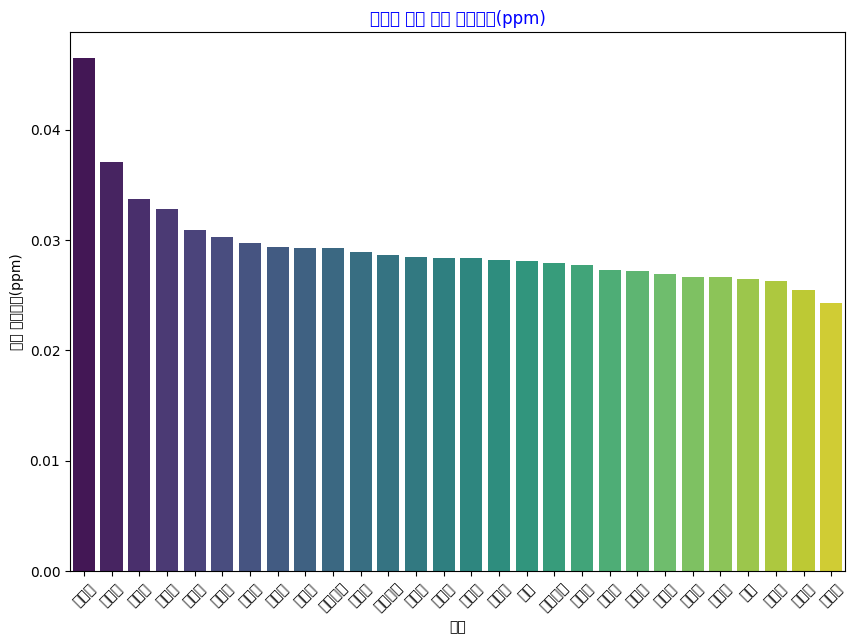

In [38]:
selected_locations = ['강동구', '강서구', '강남구', '강북구', '강남구','강동구','강북구','강서구','관악구','관악산','광진구','구로구','금천구','노원구','도봉구',
                      '동대문구','동작구','마포구','북한산','서대문구','서초구','성북구','송파구','양천구','영등포구','용산구','은평구','종로','종로구','중구','중랑구']

# 선택한 지역들 중 하나인 행들을 선택
df_selected = df[df['측정소명'].isin(selected_locations)]

# 오존농도(ppm)이 0보다 큰 행들만 선택
df = df[(df['오존농도(ppm)'] > 0)]

# 각 지역의 평균 오존농도 계산
top = df.groupby('측정소명')['오존농도(ppm)'].mean().sort_values(ascending=False)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'  # 사용할 한글 폰트 설정

# 시각화
plt.figure(figsize=(10,7))
sns.barplot(x=top.index, y=top.values, palette='viridis')

plt.title('지역에 따른 평균 오존농도(ppm)', color='blue')
plt.xlabel('지역')
plt.ylabel('평균 오존농도(ppm)')
plt.xticks(rotation=45)  # x축 라벨을 45도 회전하여 보기 편하게 설정
plt.show()

/tmp/ipykernel_2179/3267015384.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['측정소명'] = le.fit_transform(X['측정소명'])
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyp

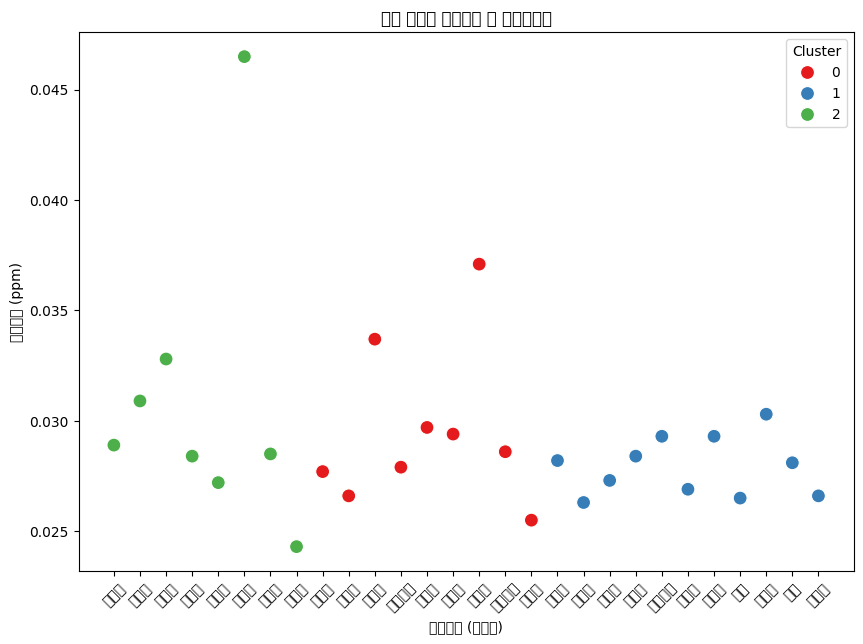

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 클러스터링에 사용할 열 선택
X = df[['오존농도(ppm)', '측정소명']]

# '측정소명' 열을 LabelEncoder를 사용하여 숫자형으로 변환
le = LabelEncoder()
X['측정소명'] = le.fit_transform(X['측정소명'])

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 클러스터링 결과를 데이터프레임에 추가
df['cluster'] = kmeans.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='측정소명', y='오존농도(ppm)', hue='cluster', palette='Set1', s=100)
plt.xticks(rotation=45)
plt.title('오존 농도를 기반으로 한 클러스터링')
plt.xlabel('측정소명 (숫자형)')
plt.ylabel('오존농도 (ppm)')
plt.legend(title='Cluster')
plt.show()

In [32]:
from sklearn.cluster import KMeans

nclusters = 3  # 클러스터 개수
seed = 0  # 랜덤 시드 설정

# KMeans 모델 초기화
km = KMeans(n_clusters=nclusters, random_state=seed, n_init=10)

# 데이터에 모델 적합
km.fit(X)

# 각 데이터 포인트의 클러스터 예측
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [33]:
from sklearn import metrics

#metrics.silhouette_score 함수는 실루엣 점수를 계산하는 함수.  이 점수가 높을수록 클러스터링 결과가 좋다고 해석할 수 있다.
# 클러스터링 결과의 실루엣 점수 계산
score = metrics.silhouette_score(X, y_cluster_kmeans)

# 출력
score


0.5458111653258975

In [34]:
from sklearn.cluster import KMeans

# 각 클러스터 수에 대한 WCSS를 저장할 리스트 초기화
wcss = []

# 클러스터 수를 1부터 10까지 변경하면서 K-means 알고리즘 실행
for i in range(1, 11):
    # K-means 알고리즘 생성 및 학습
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    
    # WCSS 값을 리스트에 추가
    wcss.append(kmeans.inertia_)


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

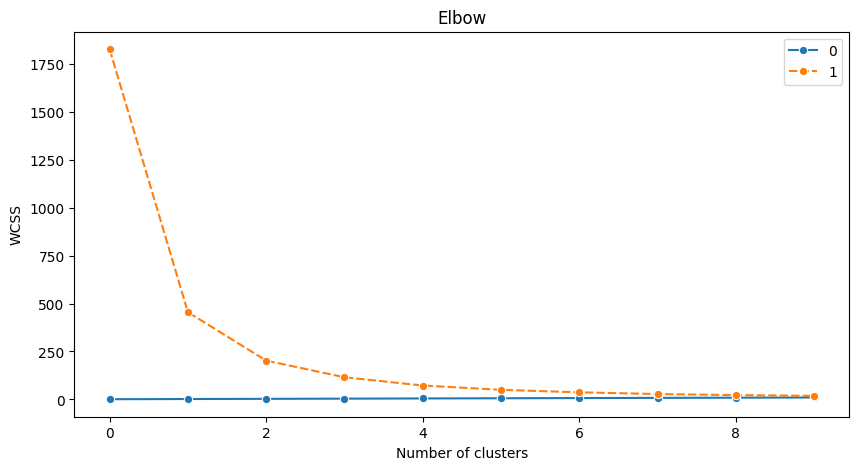

In [35]:
# 그래프의 크기를 설정
plt.figure(figsize=(10,5))

# range(1, 11)에 대한 WCSS 값을 선 그래프로 그림
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/

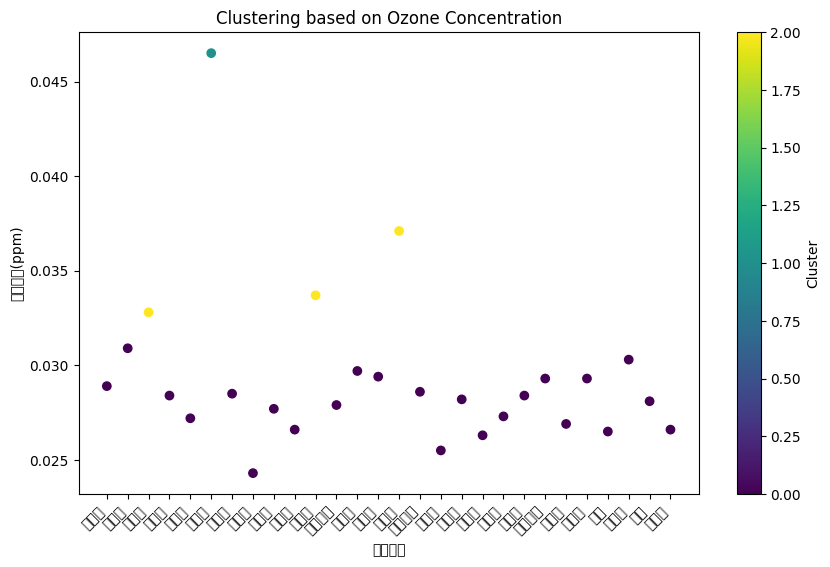

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# KMeans 클러스터링에 사용할 열 선택
X = df[['오존농도(ppm)']]

# KMeans 모델 생성 및 학습
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# 클러스터링 결과 예측
labels = kmeans.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))  # 플롯 사이즈 조정
plt.scatter(df['측정소명'], df['오존농도(ppm)'], c=labels, cmap='viridis')
plt.xticks(rotation=45, ha='right')  # xticks 회전 및 정렬 방식 설정
plt.xlabel('측정소명')
plt.ylabel('오존농도(ppm)')
plt.title('Clustering based on Ozone Concentration')
plt.colorbar(label='Cluster')
plt.show()


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# '측정소명' 열을 LabelEncoder를 사용하여 숫자형으로 변환
le = LabelEncoder()
df['측정소명_code'] = le.fit_transform(df['측정소명'])

# 정답 레이블 생성
y_true = df['측정소명_code']

# majority_vote 함수를 사용하여 예측값 계산
predicted_labels = majority_vote(labels, y_true)

# 정확도 계산
accuracy = accuracy_score(y_true, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.11
